Ahora hacemos uso de lazypredict para ver qué algoritmos son más certeros y así poder entrenar de manera individual los que se concideren mejor

In [ ]:
!pip install lazypredict

Importamos librerías, cargamos y limpiamos base de datos

In [ ]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cardiovascular_1=pd.read_csv('/content/drive/MyDrive/cardiovascular_clean.csv')

In [ ]:
cardiovascular_1.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bp_category_encoded
0,50,2,110,80,1,1,0,0,1,0,21.97,Hypertension Stage 1
1,55,1,140,90,3,1,0,0,1,1,34.93,Hypertension Stage 2
2,51,1,130,70,3,1,0,0,0,1,23.51,Hypertension Stage 1
3,48,2,150,100,1,1,0,0,1,1,28.71,Hypertension Stage 2
4,47,1,100,60,1,1,0,0,0,0,23.01,Normal


In [ ]:
cardiovascular=cardiovascular_1.drop(columns=['bp_category_encoded'])
cardiovascular.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,Estado
0,50,2,110,80,1,1,0,0,1,0,21.97,2
1,55,1,140,90,3,1,0,0,1,1,34.93,3
2,51,1,130,70,3,1,0,0,0,1,23.51,2
3,48,2,150,100,1,1,0,0,1,1,28.71,3
4,47,1,100,60,1,1,0,0,0,0,23.01,1


Hacemos un mapa de calor para ver qué columnas están más relacionadas y con base en ellas hacer el análisis

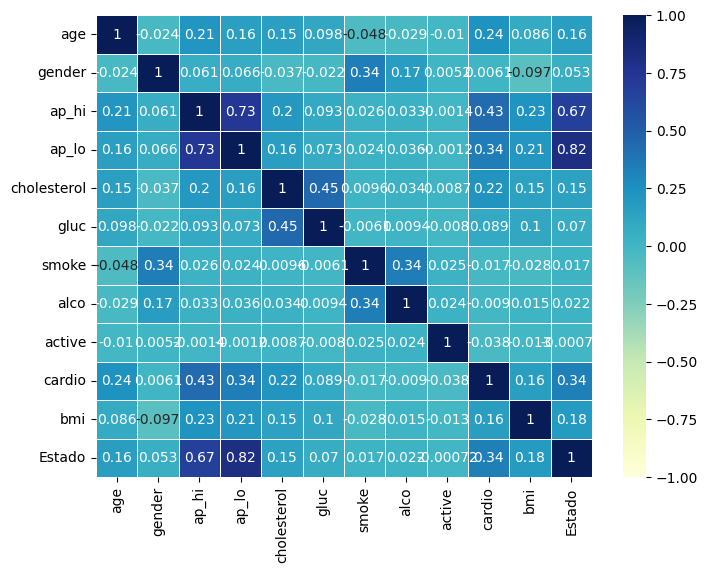

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cardiovascular.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

En este caso eligiremos las columnas presión arterial diastólica ('ap_lo'), presión arterial sistólica ('ap_hi') y si es fumador ('smoke') para
visualizar si existe relación entre estas y el tener algún problema de salud cardiovascular ('cardio'). Elegimos el porcentaje del test

In [ ]:
X=cardiovascular[['ap_hi','ap_lo','smoke']]
Y=cardiovascular['cardio']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [ ]:
Realizamos el test

In [ ]:
clf=LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
models=clf.fit(X_train,X_test,Y_train,Y_test)
print(models)

 38%|███▊      | 11/29 [00:20<00:28,  1.61s/it]